In [188]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Allison

In [189]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [190]:
from allison.linear_model import LinearRegression
from allison.datasets import train_test_split

In [191]:
n = 100000
x=np.linspace(2,20,n)
y=2*x + 1 + 2*np.sin(x) + np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.00000,6.970730
1,2.00018,6.448284
2,2.00036,7.220634
3,2.00054,8.023709
4,2.00072,6.242705


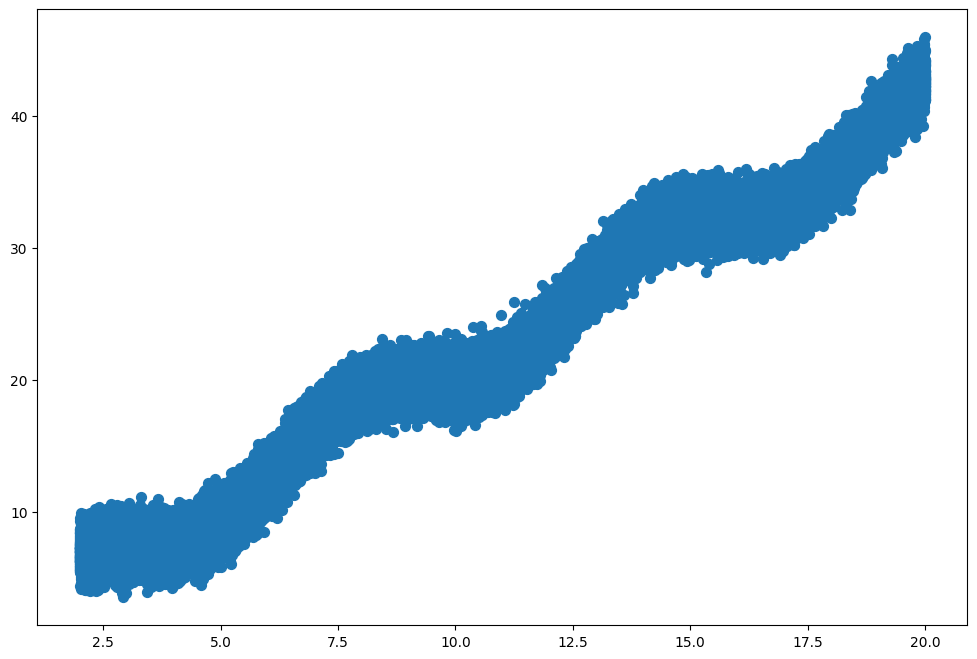

In [192]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [193]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [194]:
model=LinearRegression(lr=0.1)

start = datetime.now()
model.fit(X_train,y_train)
end = datetime.now()
delta = end-start

train_allison_time = delta.total_seconds()

print(f'Time: {train_allison_time}s')
score = model.score(X_test,y_test)
score

Time: 0.255288s


np.float64(0.9665585076145128)

In [195]:
model.coef_,model.intercept_

(array([1.93089801]), np.float64(0.825360660973485))

In [196]:
start = datetime.now()
model.predict(X_test)
end = datetime.now()
delta = end-start

tiempo_allison = delta.total_seconds()

print(f'Time: {tiempo_allison}s')

Time: 0.000876s


Text(5, 5, 'y = 1.93x + 0.825')

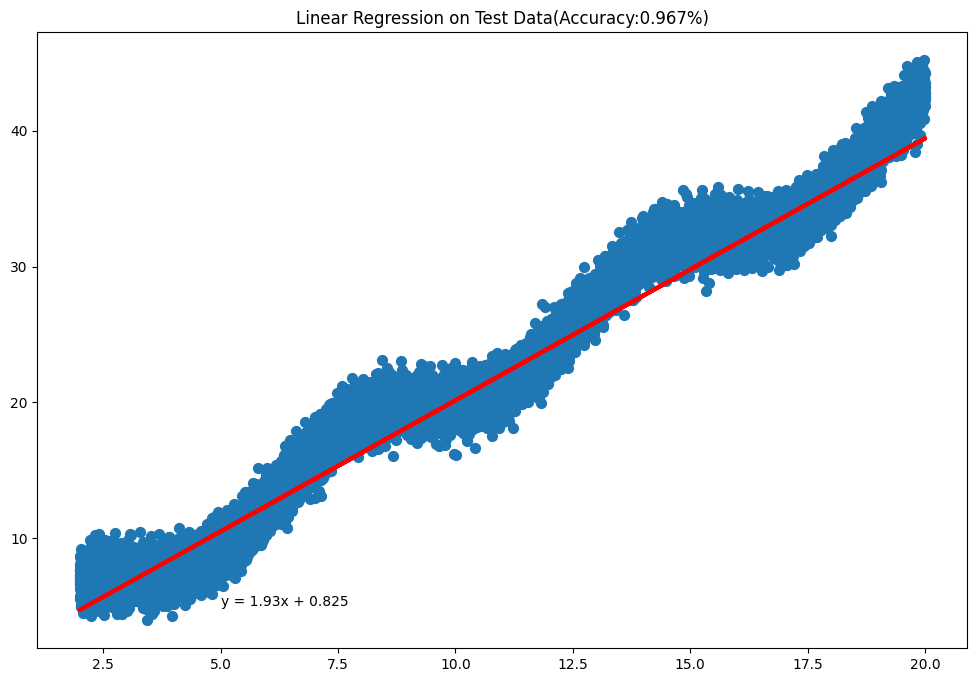

In [197]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.plot(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{score:.3f}%)')
plt.text(5, 5, f'y = {model.coef_[0]:.2f}x + {model.intercept_:.3f}')

In [198]:
from sklearn.linear_model import LinearRegression


In [199]:
X_train = data['x'].to_numpy().reshape(-1,1)
X_test = data['x'].to_numpy().reshape(-1,1)

y_train = data['y'].to_numpy()
y_test = data['y'].to_numpy()

In [200]:
model = LinearRegression()

start = datetime.now()
model.fit(X_train,y_train,)
end = datetime.now()
delta = end-start

train_sklearn_tiempo = delta.total_seconds()

print(f'Time: {train_sklearn_tiempo}s')
score = model.score(X_test,y_test)
score

Time: 0.001659s


0.9737918319846098

In [201]:
model.coef_

array([2.00086037])

In [202]:
model.intercept_

np.float64(0.9014994074925262)

In [203]:
start = datetime.now()
model.predict(X_test)
end = datetime.now()
delta = end-start

tiempo_skalearn = delta.total_seconds()

print(f'Time: {tiempo_skalearn}s')

Time: 0.00065s


Text(5, 5, 'y = 2.00x + 0.901')

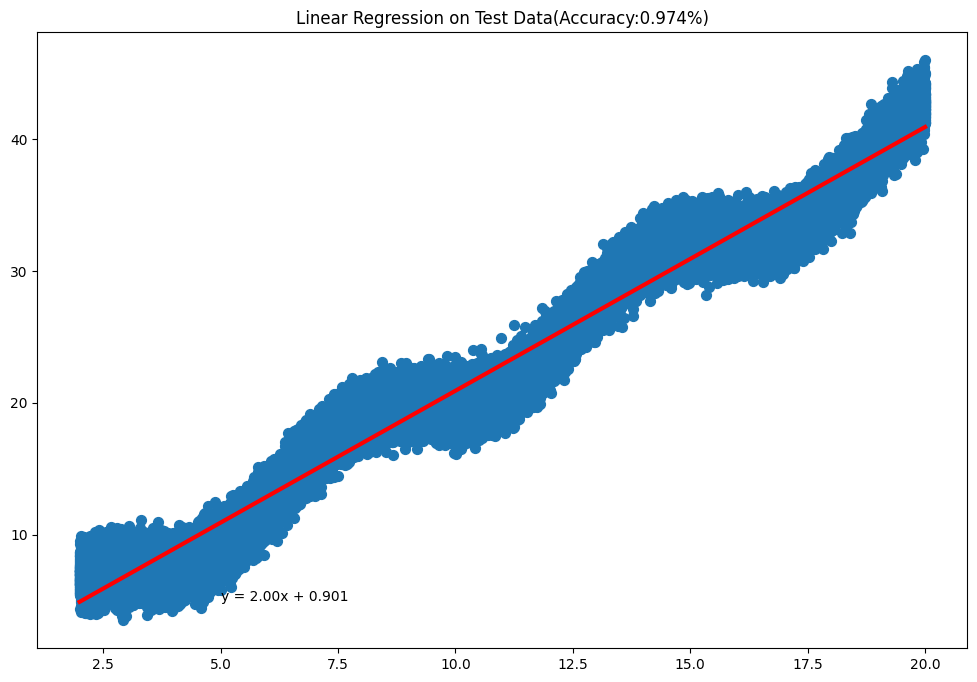

In [204]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.plot(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{score:.3f}%)')
plt.text(5, 5, f'y = {model.coef_[0]:.2f}x + {model.intercept_:.3f}')

In [205]:
train_allison_time/train_sklearn_tiempo

153.88065099457503

In [206]:
tiempo_allison/tiempo_skalearn

1.3476923076923077